# Loading the wine dataset 

In [1]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns = ['class label', 'Alcohol', 'Malic acid']

df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


# Standardization and Min-Max scaling 

In [8]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

print(f'Mean after standardization:\nAlcohol={df_std[:, 0].mean():.2f}, Malic acid={df_std[:, 1].mean():.2f}')
print(f'\nStandard Deviation after standardization:\nAlcohol={df_std[:, 0].std()}, Malic acid={df_std[:, 1].std()}')

print(f'\nMin-value after min-max:\nAlcohol={df_minmax[:, 0].min():.2f}, Malic acid={df_minmax[:, 1].min():.2f}')
print(f'\nMax-value after min-max:\nAlcohol={df_minmax[:, 0].max()}, Malic acid={df_minmax[:, 1].max()}')

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard Deviation after standardization:
Alcohol=1.0, Malic acid=1.0

Min-value after min-max:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max:
Alcohol=1.0, Malic acid=1.0


# Plotting 

In [9]:
%matplotlib inline

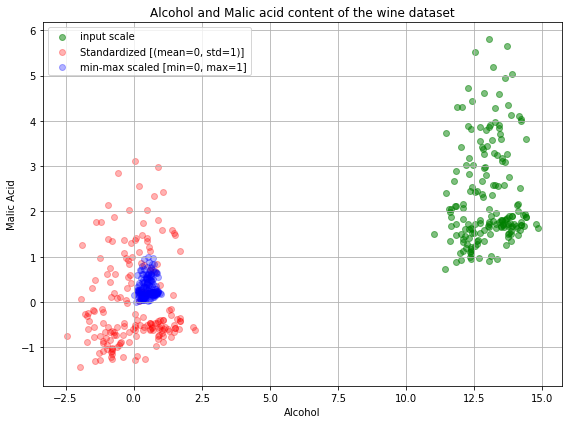

In [15]:
import matplotlib.pyplot as plt

def plot():
    plt.figure(figsize=(8, 6))
    
    plt.scatter(df['Alcohol'], df['Malic acid'],
               color='green', label='input scale', alpha=0.5)
    
    plt.scatter(df_std[:, 0], df_std[:, 1], color='red', 
               label='Standardized [(mean=0, std=1)]', alpha=0.3)
    
    plt.scatter(df_minmax[:, 0], df_minmax[:, 1], color='blue',
               label='min-max scaled [min=0, max=1]', alpha=0.3)
    
    plt.title('Alcohol and Malic acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()
    
plot()
plt.show()